In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('[Final]Best_feautres_df.csv',sep='\t',encoding='utf-8')

In [66]:
append_df = pd.read_csv('polarity_socre.csv',sep='\t',encoding='utf-8')

In [67]:
drop_column_list = ['Post_id', 'Blog_mobile_profile_img','Count_neighbors','Post_interval_average',
 'Text_similarity',
 'Total_post',
 'User_Id_len',
 'Comment_interaction',
 'Blog_mobile_profile_img',
 'Opening_date',
'Blog_info_text_len',]

In [68]:
df['polarity'] = append_df['polarity']

In [69]:
new_df = df.drop(drop_column_list,axis=1)

In [70]:
new_df.columns.tolist()

['FR_url',
 'Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
 'Text_len',
 'senti_diffs_per_ref',
 'pos_ratio',
 'neg_ratio',
 'subjectivity',
 'Sticker_count',
 'Credibility',
 'polarity']

In [71]:
Analysis_df = new_df.fillna(0)

In [10]:
Analysis_df.to_csv('[Final]Best_features_Analysis_df.csv',sep='\t',encoding='utf-8',index=False)

# Data shuffle

In [72]:
from sklearn.utils import shuffle
Analysis_df = shuffle(Analysis_df)

In [73]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size=0.33, random_state=42)

In [51]:
Feautre_list = Analysis_df.columns.tolist()[:-1]

In [29]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x) 

# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(x) 
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

## Chi-squre feature selection

In [77]:
feature_name = X_scaled.columns.tolist()

In [78]:
feature_name

['FR_url',
 'Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
 'Text_len',
 'senti_diffs_per_ref',
 'pos_ratio',
 'neg_ratio',
 'subjectivity',
 'Sticker_count',
 'polarity']

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=12)
chi2_selector.fit(X_scaled, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(feature_name, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(feature_name)[chi2_selector.get_support()]

In [34]:
feature_dict = dict(zip(feature_name,chi2_selector.scores_))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[0])

Feature ranking:
FR_url
Sticker_count
Tag_count
polarity
neg_ratio
subjectivity
First_ratio
Second_ratio
Question_count
senti_diffs_per_ref
Text_len
pos_ratio


# Random Forest

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
print("RF :",accuracy_score(clf.predict(x_test),y_test))

RF : 0.7063742798736294


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.82      0.35      0.49      2175
          1       0.68      0.95      0.79      3206

avg / total       0.74      0.71      0.67      5381



In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, cv=5)
scores   

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn

array([0.70416922, 0.70907419, 0.7095092 , 0.72208589, 0.70797546])

Feature ranking:
FR_url
Text_len
Sticker_count
neg_ratio
pos_ratio
polarity
Question_count
senti_diffs_per_ref
subjectivity
First_ratio
Tag_count
Second_ratio


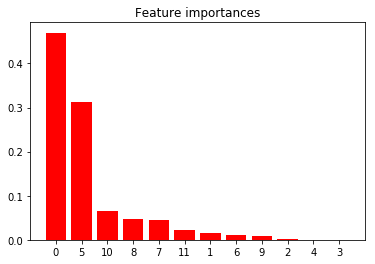

In [82]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled.shape[1]):
    #print("%d. feature %s (%f)" % (f + 1, Feautre_list[indices[f]], importances[indices[f]]))
    print(feature_name[indices[f]])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Logistic Regression

In [83]:
from  sklearn  import  linear_model
logreg = linear_model.LogisticRegression(C=2.0,random_state=42,solver='sag',multi_class='multinomial',warm_start=True)
logreg.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=True)

In [84]:
print("LR :",accuracy_score(logreg.predict(x_test),y_test))

LR : 0.722542278386917


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.79      0.43      0.55      2175
          1       0.70      0.92      0.80      3206

avg / total       0.74      0.72      0.70      5381



In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_scaled, y, cv=5)
scores         

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pass

array([0.73083998, 0.71489884, 0.72607362, 0.71625767, 0.72546012])

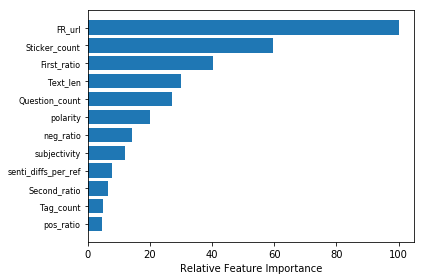

In [87]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [88]:
feature_dict = dict(zip(feature_name,feature_importance))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for feature in ranking_list:
    #print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))
    print(feature[0])

Feature ranking:
FR_url
Sticker_count
First_ratio
Text_len
Question_count
polarity
neg_ratio
subjectivity
senti_diffs_per_ref
Second_ratio
Tag_count
pos_ratio


## MLP

In [29]:
import time
from sklearn.neural_network import MLPClassifier

In [30]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=35,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    tol=1e-4,
    random_state=1,
    learning_rate_init=.1
)

In [31]:
start = time.time()
mlp_clf.fit(x_train, y_train)
end = time.time()
print('Time: {:f}s'.format(end-start))sg

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.58131300
Iteration 2, loss = 0.53098598
Iteration 3, loss = 0.51813057
Iteration 4, loss = 0.51015212
Iteration 5, loss = 0.50234529
Iteration 6, loss = 0.49927206
Iteration 7, loss = 0.49574962
Iteration 8, loss = 0.49115275
Iteration 9, loss = 0.48754968
Iteration 10, loss = 0.48676064
Iteration 11, loss = 0.48388428
Iteration 12, loss = 0.48143043
Iteration 13, loss = 0.47982382
Iteration 14, loss = 0.47791064
Iteration 15, loss = 0.47733224
Iteration 16, loss = 0.47652904
Iteration 17, loss = 0.47454367
Iteration 18, loss = 0.47273096
Iteration 19, loss = 0.47187961
Iteration 20, loss = 0.47146734
Iteration 21, loss = 0.47204503
Iteration 22, loss = 0.47035816
Iteration 23, loss = 0.46709672
Iteration 24, loss = 0.47007310
Iteration 25, loss = 0.46865978
Iteration 26, loss = 0.46871425
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Time: 0.707511s


In [32]:
y_pred = mlp_clf.predict(x_test)
print("테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

테스트 정확도: 0.784


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp_clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.76      0.65      0.70      2084
          1       0.80      0.87      0.83      3297

avg / total       0.78      0.78      0.78      5381



In [34]:
x.shape

(16304, 12)

In [35]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


Epoch 1/30
10923/10923 [==============================] - 1s 132us/step - loss: 0.5653 - f1: 0.7899 - acc: 0.7143
Epoch 2/30
10923/10923 [==============================] - 1s 77us/step - loss: 0.5222 - f1: 0.8068 - acc: 0.7430
Epoch 3/30
10923/10923 [==============================] - 1s 77us/step - loss: 0.5079 - f1: 0.8090 - acc: 0.7541
Epoch 4/30
10923/10923 [==============================] - 1s 76us/step - loss: 0.4941 - f1: 0.8177 - acc: 0.7683
Epoch 5/30
10923/10923 [==============================] - 1s 79us/step - loss: 0.4824 - f1: 0.8235 - acc: 0.7750
Epoch 6/30
10923/10923 [==============================] - 1s 78us/step - loss: 0.4773 - f1: 0.8249 - acc: 0.7787
Epoch 7/30
10923/10923 [==============================] - 1s 78us/step - loss: 0.4737 - f1: 0.8265 - acc: 0.7810
Epoch 8/30
10923/10923 [==============================] - 1s 79us/step - loss: 0.4670 - f1: 0.8249 - acc: 0.7795
Epoch 9/30
10923/10923 [==============================] - 1s 81us/step - loss: 0.4638 - f1: 0.8

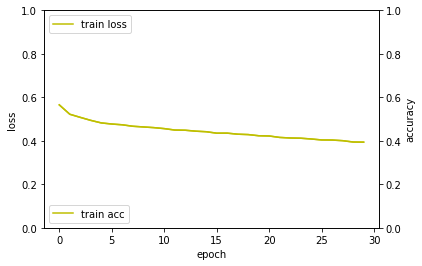

5381/5381 [==============================] - 0s 48us/step


[0.4494265842268268, 0.8346663671584627, 0.7944619959115407]

In [37]:
# import framework
import numpy as np
from  keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# data load
np.random.seed(5)

data_num = 10923
data_feature_num = 12
epoch = 30
batch_size = 128 

# data preprocessing

# model
model = Sequential()
model.add(Dense(62, input_dim=data_feature_num, activation='relu'))
model.add(Dense(124, input_dim=62, activation='relu'))
model.add(Dense(62, input_dim=124, activation='relu'))
model.add(Dense(data_feature_num, input_dim=62, activation='relu'))
model.add(Dense(1, input_dim=data_feature_num, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1,'accuracy'])

hist = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)

# draw graph
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['loss'], 'y', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# model evaluation
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=batch_size)
loss_and_metrics

In [38]:
loss_and_metrics

[0.4494265842268268, 0.8346663671584627, 0.7944619959115407]

## SVM

In [39]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

result = LinearSVC(random_state=0).fit(x_train, y_train)
result.predict(x_test)
print("SVM :",accuracy_score(result.predict(x_test),y_test))

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 0.7244006690206282


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result.predict(x_test)))

             precision    recall  f1-score   support

          0       0.78      0.40      0.53      2084
          1       0.71      0.93      0.80      3297

avg / total       0.74      0.72      0.70      5381



In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(result, X_scaled, y, cv=5)
scores    

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pass

array([0.71336603, 0.72286941, 0.72546012, 0.7202454 , 0.71779141])

# OLS Regression Results

In [ ]:
import statsmodels.api as sm
x_2 = sm.add_constant(x)
est = sm.OLS(y,x_2.astype(float)).fit()

In [ ]:
print(est.summary())